# Final analysis
This notebook draws the final conclusions regarding winter maintenance/service

## loading data and libraries

In [1]:
import geopandas as gpd
import pandas as pd
from pathlib import Path
import custom_functions_test
import seaborn as sns
import numpy as np
import scipy

In [2]:
matched_maintenance_complete = gpd.read_file("../data/processed/cycle_frequency_maintenance/cycle_and_frequency_maintenance.geojson")


In [3]:
# hamburg areas for memory friendly reality checks
hamburg_areas = gpd.read_file(Path("../data/raw/hamburg_districts/HH_WFS_Verwaltungsgrenzen"),
                             layer = "stadtteile").set_crs(25832)
neustadt = hamburg_areas[hamburg_areas["stadtteil_name"] == "Neustadt"]

## Overall maintenace stats of Hamburg

In [4]:
matched_maintenance_complete.columns

Index(['osm_id', 'fclass_x', 'name', 'ref', 'oneway', 'maxspeed', 'status',
       'strassenname', 'radweg_art', 'klasse', 'anzahl_x', 'geschwindigkeit',
       'strichstaerke', 'id', 'strasse', 'maintained', 'bezirk_name_right',
       'stadtteil_name_right', 'area_intersection', 'geometry'],
      dtype='object')

In [5]:
# overall maintenace stats
matched_maintenance_complete_grouped_maintenance = matched_maintenance_complete.groupby("maintained")
length_maintained_unmaintained = matched_maintenance_complete_grouped_maintenance.agg(length = ("geometry", lambda x: x.length.sum()/1000),
                                                                                     total_registered_passages = ("anzahl_x", "sum"))
length_maintained_unmaintained["percentage"] = (length_maintained_unmaintained["length"]/ length_maintained_unmaintained["length"].sum()*100).round(2)
length_maintained_unmaintained

,length,total_registered_passages,percentage
maintained,,,
maintained,3323.108867,7365653.0,40.41
not maintained,4901.141062,2080109.0,59.59


As we can see, around 40 % of Hamburgs cycle lane network reiceives winter service.

## Overall maintenace stats of Districts

In [6]:
matched_maintenance_complete_grouped_maintenance_district = matched_maintenance_complete.groupby(["stadtteil_name_right", "maintained"])
matched_maintenance_complete_grouped_maintenance_district_agg = matched_maintenance_complete_grouped_maintenance_district.agg(length = ("geometry", lambda x: x.length.sum()/1000),
                                                                                                                             total_registered_passages = ("anzahl_x", "sum")).reset_index()
matched_maintenance_complete_grouped_maintenance_district_agg
matched_maintenance_complete_grouped_maintenance_district_agg["percentage"] = matched_maintenance_complete_grouped_maintenance_district_agg.groupby(["stadtteil_name_right"])["length"].transform(lambda x: round(x/x.sum()*100,2))
pd.set_option('display.max_rows', 500)

matched_maintenance_complete_grouped_maintenance_district_agg

#pd.set_option('display.max_rows', 10)

,stadtteil_name_right,maintained,length,total_registered_passages,percentage
0,Allermöhe,maintained,34.765127,19379.0,63.40
1,Allermöhe,not maintained,20.067707,4302.0,36.60
2,Alsterdorf,maintained,33.764942,98319.0,56.29
3,Alsterdorf,not maintained,26.218519,19178.0,43.71
4,Altengamme,maintained,17.227472,7289.0,41.31
5,Altengamme,not maintained,24.477973,1434.0,58.69
6,Altenwerder,maintained,19.441615,3022.0,73.10
7,Altenwerder,not maintained,7.152855,1948.0,26.90
8,Altona-Altstadt,maintained,35.199679,177879.0,49.48
9,Altona-Altstadt,not maintained,35.936811,30169.0,50.52


In [7]:
# ranking the districts as to the percentage of maintenance
matched_maintenance_complete_grouped_maintenance_district_agg.loc[matched_maintenance_complete_grouped_maintenance_district_agg["maintained"] =="maintained"].sort_values("percentage", ascending = False)

,stadtteil_name_right,maintained,length,total_registered_passages,percentage
22,Billbrook,maintained,38.671034,37062.0,90.88
84,Hoheluft-West,maintained,13.082105,93058.0,84.73
174,Steinwerder,maintained,21.089684,64503.0,82.74
30,Borgfelde,maintained,16.837735,64942.0,82.20
192,Waltershof,maintained,25.121589,4082.0,81.21
72,Hammerbrook,maintained,32.719768,153954.0,76.74
166,Spadenland,maintained,3.368553,1836.0,75.11
6,Altenwerder,maintained,19.441615,3022.0,73.10
68,Hamburg-Altstadt,maintained,41.688896,343079.0,72.91
186,Uhlenhorst,maintained,26.159994,169550.0,72.24


Text(0.5, 1.0, 'Scatterplot: percentage of bicycle-lane-network\nmaintained vs total count of registered passages\n\nLevel: Districts')

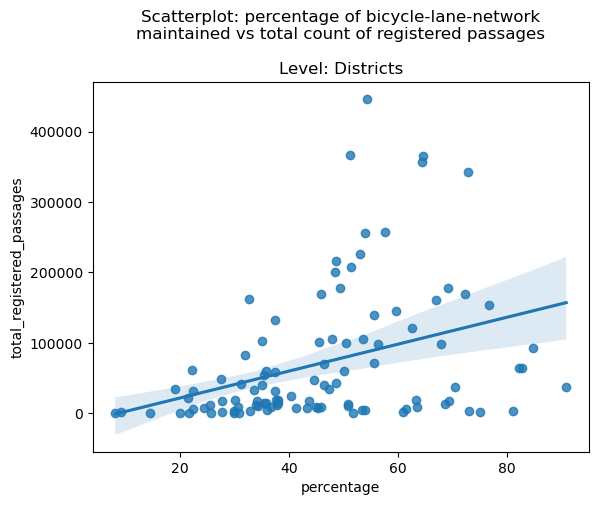

In [8]:
# checking if there is a relationship between total registered passages/frequency and maintenance intensity
mask = matched_maintenance_complete_grouped_maintenance_district_agg["maintained"] == "maintained"
matched_maintenance_complete_grouped_maintenance_district_agg_maintaned = matched_maintenance_complete_grouped_maintenance_district_agg[mask]

sns.regplot(data = matched_maintenance_complete_grouped_maintenance_district_agg_maintaned,
                x = "percentage",
                y = "total_registered_passages").set_title('Scatterplot: percentage of bicycle-lane-network\nmaintained vs total count of registered passages\n\nLevel: Districts')


In [9]:
#check correlation
scipy.stats.pearsonr(matched_maintenance_complete_grouped_maintenance_district_agg_maintaned["total_registered_passages"], matched_maintenance_complete_grouped_maintenance_district_agg_maintaned["percentage"] )

PearsonRResult(statistic=0.3565289297037747, pvalue=0.00021862669208049505)

The correlation coefficiant of 0.37 tells us that there is a moderatre positive correlation between total registered passages in a district andthe percentage of maintained cycle lanes. This suggests that as the total number of registered passages increases, the percentage also tends to increase, though the relationship is not very strong. However we can be sure that the correlation is not random because the p-value is low. So there is a certain relationship that is however not very strong.

Looking at the scatterplot this general trend becomes visible too. But as the correlation already indicated, some districts with a relatively high quantity of cyclists receive relatively low maintenace. The table and the map below shows allall those districts where the total number of registered cycle passages is above median and the percentage of the cycle lanes maintained is below median. We could say that these districts should be given more priority in winter maintenance, especially the those with a high overall number of cyclist passages such as:

- Bahrenfeld
- Stellingen
- Lohbrügge
- Lokstedt

In [10]:
# creating df of unsufficiently mainteined districts

mask = (matched_maintenance_complete_grouped_maintenance_district_agg_maintaned["total_registered_passages"] > matched_maintenance_complete_grouped_maintenance_district_agg_maintaned["total_registered_passages"].median()) & (matched_maintenance_complete_grouped_maintenance_district_agg_maintaned["percentage"] < matched_maintenance_complete_grouped_maintenance_district_agg_maintaned["percentage"].median())
unsufficiently_maintained_districts = matched_maintenance_complete_grouped_maintenance_district_agg_maintaned[mask]
unsufficiently_maintained_districts.sort_values("total_registered_passages", ascending = False).drop(columns = (["maintained", "length"])).rename(columns = {"stadtteil_name_right": "district",
                                                                                                                                                            "total_registered_passages": "total_registered_passages_2023",
                                                                                                                                                            "percentage": "percentage maintained"})

,district,total_registered_passages_2023,percentage maintained
12,Bahrenfeld,162789.0,32.73
176,Stellingen,132394.0,37.48
106,Lohbrügge,102058.0,35.03
108,Lokstedt,82990.0,32.00
138,Ohlsdorf,61548.0,22.20
32,Bramfeld,60703.0,35.76
88,Horn,58687.0,37.53
24,Billstedt,54993.0,35.38
42,Eidelstedt,48898.0,27.64
142,Othmarschen,47779.0,44.62


In [11]:
# adding the label
matched_maintenance_complete_grouped_maintenance_district_agg["unsufficiently_maintained"] = np.where(matched_maintenance_complete_grouped_maintenance_district_agg["stadtteil_name_right"].isin(unsufficiently_maintained_districts["stadtteil_name_right"]), "unsufficiently maintained", 'sufficiently maintained')

Text(0.5, 1.0, 'Sufficiency of Winter Maintenance by District\nA Comparative Overview')

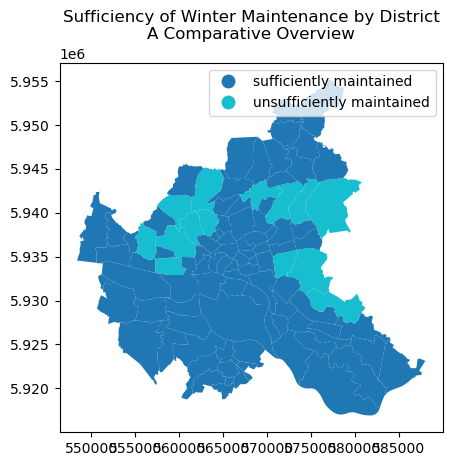

In [12]:
# merging district geometries to agg dataset for plotting

matched_maintenance_complete_grouped_maintenance_district_agg_map = matched_maintenance_complete_grouped_maintenance_district_agg.merge(hamburg_areas, left_on="stadtteil_name_right", right_on="stadtteil_name")
mask = matched_maintenance_complete_grouped_maintenance_district_agg["maintained"] == "maintained"
matched_maintenance_complete_grouped_maintenance_district_agg_map_maintaned = matched_maintenance_complete_grouped_maintenance_district_agg_map[mask]
matched_maintenance_complete_grouped_maintenance_district_agg_map_maintaned = gpd.GeoDataFrame(matched_maintenance_complete_grouped_maintenance_district_agg_map_maintaned)
matched_maintenance_complete_grouped_maintenance_district_agg_map_maintaned.plot(column = "unsufficiently_maintained", legend = True).set_title("Sufficiency of Winter Maintenance by District\nA Comparative Overview")


The map presented offers insightful observations regarding the patterns of maintenance across different districts, revealing a nuanced relationship between a district's location and its maintenance coverage:

1. Central districts are more likely to benefit from a higher proportion of maintenance activities.
2. Conversely, rural districts also tend to enjoy high maintenance coverage.
3. Non central but urban areas receive low relative maintenance

At first glance, this appears to be contradictory, yet both statements hold true. This seeming paradox is resolved when we take into account the infrastructure complexity of these areas. Rural districts, with their simpler and less dense lane and street networks, facilitate easier maintenance. As the number of lanes within a district increases, achieving comprehensive maintenance coverage becomes more challenging. This explains why the urban districts in the north and west of Hamburg receive a lower proportion of maintenance relative to their needs.

Text(0.5, 1.0, 'Map of percentage of cycle lanes receiving\nmaintenance in winter')

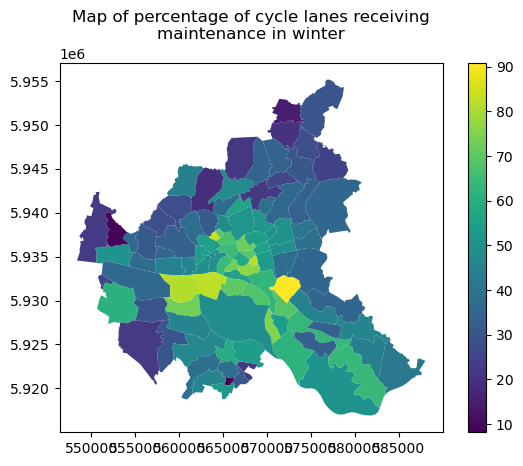

In [13]:
# check out overall maintenance of all districts in a plot

mask = matched_maintenance_complete_grouped_maintenance_district_agg_map["maintained"] == "maintained"
matched_maintenance_complete_grouped_maintenance_district_agg_map_maintaned = matched_maintenance_complete_grouped_maintenance_district_agg_map[mask]
matched_maintenance_complete_grouped_maintenance_district_agg_map_maintaned = gpd.GeoDataFrame(matched_maintenance_complete_grouped_maintenance_district_agg_map_maintaned)
matched_maintenance_complete_grouped_maintenance_district_agg_map_maintaned.plot(column = "percentage", legend = True).set_title("Map of percentage of cycle lanes receiving\nmaintenance in winter")


Text(0.5, 1.0, 'Map of percentage of cycle lanes not recieving\nmaintenance in winter')

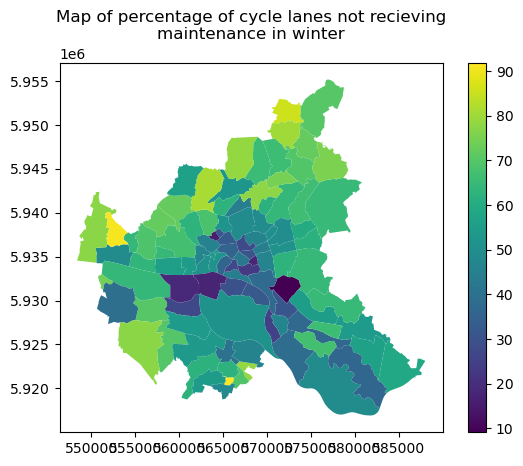

In [14]:
# check out overall non-maintenance of all districts in a plot


mask = matched_maintenance_complete_grouped_maintenance_district_agg_map["maintained"] == "not maintained"
matched_maintenance_complete_grouped_maintenance_district_agg_map_maintaned = matched_maintenance_complete_grouped_maintenance_district_agg_map[mask]
matched_maintenance_complete_grouped_maintenance_district_agg_map_maintaned = gpd.GeoDataFrame(matched_maintenance_complete_grouped_maintenance_district_agg_map_maintaned)
matched_maintenance_complete_grouped_maintenance_district_agg_map_maintaned.plot(column = "percentage", legend = True).set_title("Map of percentage of cycle lanes not recieving\nmaintenance in winter")

## Analysis of individual lanes

In this chapter we derive a list of streets/lanes that are frequented by a high number of cyclists but receive no winter maintenance.

In [15]:
# just checking the quantiles to get a feel for what is a high cyclist rate
np.nanquantile(matched_maintenance_complete["anzahl_x"], 0.95)

643.0

In [16]:
# for the suggestions lets take only the 10 % most frequented cycle lanes and filter out those not maintained

top_mask = (matched_maintenance_complete["anzahl_x"] > np.nanquantile(matched_maintenance_complete["anzahl_x"], 0.90)) & (matched_maintenance_complete["maintained"] == "not maintained") 
matched_maintenance_complete_top = matched_maintenance_complete[top_mask]
matched_maintenance_complete_top.explore(
    color="red",  
    style_kwds={
        'color': 'red',  
        'weight': 2,      
        'fillOpacity': 0.8 
    }
)

In [17]:
# examples: Lohmühlenstraße, Milchstraße, Alter Wall

# errors due to poor governmental data: Langenzengbrücke

Fromn the analysis we could derive 1319 lanes or lane-sections where an improvement of maintenance should be considered. Not that because of imprecisions in the primary geo-data some of these sections may falsly be declared as "not maintained". However, we have achieved a very high accuracy.

In [18]:
matched_maintenance_complete_top.shape

(1327, 20)

In [19]:
matched_maintenance_complete_top.columns

Index(['osm_id', 'fclass_x', 'name', 'ref', 'oneway', 'maxspeed', 'status',
       'strassenname', 'radweg_art', 'klasse', 'anzahl_x', 'geschwindigkeit',
       'strichstaerke', 'id', 'strasse', 'maintained', 'bezirk_name_right',
       'stadtteil_name_right', 'area_intersection', 'geometry'],
      dtype='object')

In [20]:
matched_maintenance_complete_top.drop(columns = (["ref", "maxspeed", "strassenname", "radweg_art", "klasse", "id", "strasse", "area_intersection", "oneway"]), inplace = True)


/var/folders/rd/22m4hj_x1h15d5fnbf5j52p80000gn/T/ipykernel_1699/3570358729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_maintenance_complete_top.drop(columns = (["ref", "maxspeed", "strassenname", "radweg_art", "klasse", "id", "strasse", "area_intersection", "oneway"]), inplace = True)


In [21]:
top_10 = matched_maintenance_complete_top.nlargest(20, "anzahl_x")
top_10

,osm_id,fclass_x,name,status,anzahl_x,geschwindigkeit,strichstaerke,maintained,bezirk_name_right,stadtteil_name_right,geometry
13539,87506241,unclassified,Lohmühlenstraße,None,3909.0,NaN,NaN,not maintained,Hamburg-Mitte,St. Georg,"LINESTRING (567146.855 5935153.820, 567159.562..."
22492,23950597,footway,None,None,3826.0,NaN,NaN,not maintained,Hamburg-Nord,Hohenfelde,"LINESTRING (567228.896 5935374.613, 567272.822..."
22500,24595673,cycleway,None,None,3813.0,NaN,NaN,not maintained,Hamburg-Nord,Hohenfelde,"LINESTRING (567206.568 5935336.741, 567214.001..."
22732,605716874,cycleway,None,None,3804.0,NaN,NaN,not maintained,Hamburg-Nord,Hohenfelde,"LINESTRING (567276.881 5935434.693, 567283.473..."
22493,23950598,cycleway,None,None,3800.0,NaN,NaN,not maintained,Hamburg-Nord,Hohenfelde,"LINESTRING (567272.822 5935430.418, 567276.881..."
21003,604487638,cycleway,None,None,3727.0,NaN,NaN,not maintained,Hamburg-Mitte,Rothenburgsort,"LINESTRING (567883.508 5932829.833, 567887.949..."
21001,604487636,cycleway,None,None,3722.0,NaN,NaN,not maintained,Hamburg-Mitte,Rothenburgsort,"LINESTRING (567929.052 5932818.159, 567935.057..."
20998,604487633,unclassified,None,None,3370.0,NaN,NaN,not maintained,Hamburg-Mitte,Rothenburgsort,"LINESTRING (568212.337 5932406.195, 568211.174..."
20996,604487631,cycleway,None,None,3344.0,NaN,NaN,not maintained,Hamburg-Mitte,Rothenburgsort,"LINESTRING (568165.090 5932313.315, 568158.066..."
20997,604487632,unclassified,None,None,3338.0,NaN,NaN,not maintained,Hamburg-Mitte,Rothenburgsort,"LINESTRING (568187.870 5932358.919, 568182.683..."


In [22]:
# here is an example of the maintenance profile in Bahrenfeld
bahrenfels_mask = matched_maintenance_complete["stadtteil_name_right"] == "Bahrenfeld"
matched_maintenance_complete[bahrenfels_mask].explore(column = "maintained")